# Day 9: Smoke Basin

## Part 1

These caves seem to be lava tubes. Parts are even still volcanically active; small hydrothermal vents release smoke into the caves that slowly settles like rain.

If you can model how the smoke flows through the caves, you might be able to avoid it and be that much safer. The submarine generates a heightmap of the floor of the nearby caves for you (your puzzle input).

Smoke flows to the lowest point of the area it's in. For example, consider the following heightmap:
<pre>
2<b>1</b>9994321<b>0</b>
3987894921
98<b>5</b>6789892
8767896789
989996<b>5</b>678
</pre>
Each number corresponds to the height of a particular location, where 9 is the highest and 0 is the lowest a location can be.

Your first goal is to find the low points - the locations that are lower than any of its adjacent locations. Most locations have four adjacent locations (up, down, left, and right); locations on the edge or corner of the map have three or two adjacent locations, respectively. (Diagonal locations do not count as adjacent.)

In the above example, there are four low points, all highlighted: two are in the first row (a 1 and a 0), one is in the third row (a 5), and one is in the bottom row (also a 5). All other locations on the heightmap have some lower adjacent location, and so are not low points.

The risk level of a low point is 1 plus its height. In the above example, the risk levels of the low points are 2, 1, 6, and 6. The sum of the risk levels of all low points in the heightmap is therefore 15.

Find all of the low points on your heightmap. What is the sum of the risk levels of all low points on your heightmap?

In [1]:
import numpy as np
import numpy as np
import re
from IPython.display import Image
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
import cv2

In [2]:
def load_heightmap(path):
    file = open(path, "r")
    lines = file.readlines()
    lines = [np.array(list(map(int,l.replace("\n",'')))) for l in lines]
    
    lines = np.asarray(lines)
    lines = lines.astype(np.uint8)
    return(lines)

In [3]:
def get_connected_components(x, y, map_):
    rels = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    ccs = []
    
    for dx, dy in rels:
        x_n, y_n = x+dx, y+dy
        if 0 <= x_n < len(map_[0]) and 0 <= y_n < len(map_):
            ccs.append((x_n, y_n))
            
    return ccs

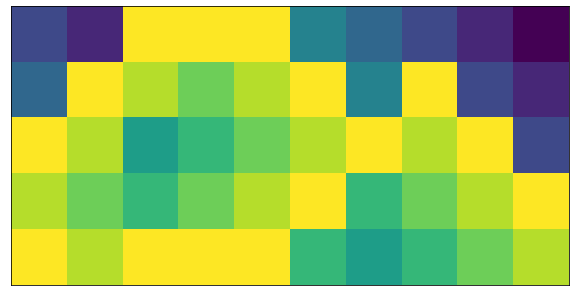

In [4]:
heightmap = load_heightmap("day09_data_test.txt")
plt.imshow(heightmap)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

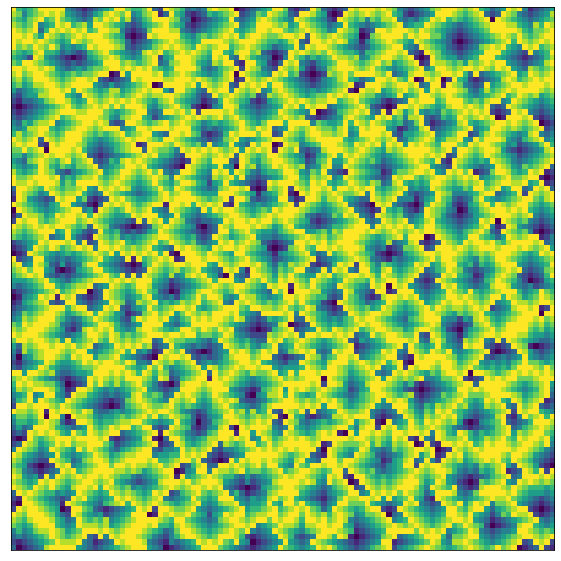

In [5]:
heightmap = load_heightmap("day09_data.txt")
plt.imshow(heightmap)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

In [6]:
minima = []

for y in range(len(heightmap)):
    for x in range(len(heightmap[y])):
        h = heightmap[y][x]
        if all(heightmap[dy][dx] > h for dx,dy in get_connected_components(x, y, heightmap)):
            minima.append((x, y))
print(sum(heightmap[y][x]+1 for x,y in minima))

423


## Part 2

Next, you need to find the largest basins so you know what areas are most important to avoid.

A basin is all locations that eventually flow downward to a single low point. Therefore, every low point has a basin, although some basins are very small. Locations of height 9 do not count as being in any basin, and all other locations will always be part of exactly one basin.

The size of a basin is the number of locations within the basin, including the low point. The example above has four basins.

The top-left basin, size 3:

<pre>
<b>21</b>99943210
<b>3</b>987894921
9856789892
8767896789
9899965678
</pre>
The top-right basin, size 9:

<pre>
21999<b>43210</b>
398789<b>4</b>9<b>21</b>
9856789892
8767896789
9899965678
</pre>
The middle basin, size 14:

<pre>
2199943210
39<b>878</b>94921
9<b>85678</b>9892
<b>87678</b>96789
9<b>8</b>99965678
</pre>
The bottom-right basin, size 9:

<pre>
2199943210
3987894921
9856789<b>8</b>92
876789<b>678</b>9
98999<b>65678</b>
</pre>
Find the three largest basins and multiply their sizes together. In the above example, this is 9 * 14 * 9 = 1134.

What do you get if you multiply together the sizes of the three largest basins?

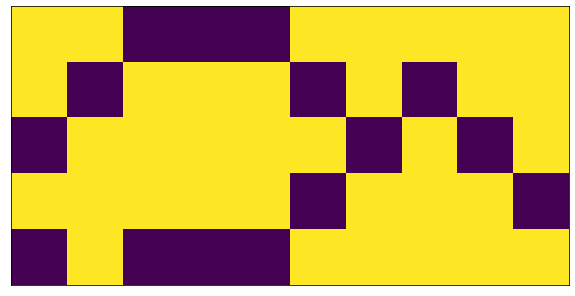

In [7]:
heightmap = load_heightmap("day09_data_test.txt")
heightmap_bool = heightmap.astype(np.uint8) < 9

plt.imshow(heightmap_bool)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

1134


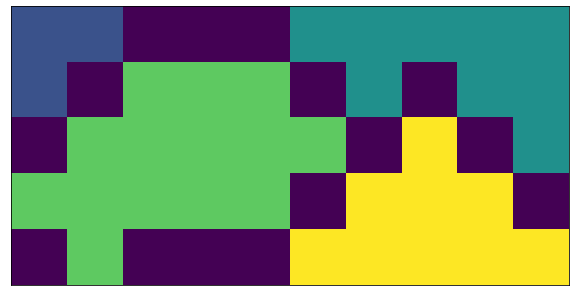

In [8]:
cc_info = cv2.connectedComponentsWithStats(heightmap_bool.astype(np.uint8), cv2.CV_32S, connectivity = 4)

(numLabels, labels, stats, centroids) = cc_info
stats = np.rot90(stats)
areas = stats[0]
areas = areas[1:]
areas = np.sort(areas)
max_areas = areas[-3:]
print(np.product(max_areas))

plt.imshow(labels)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

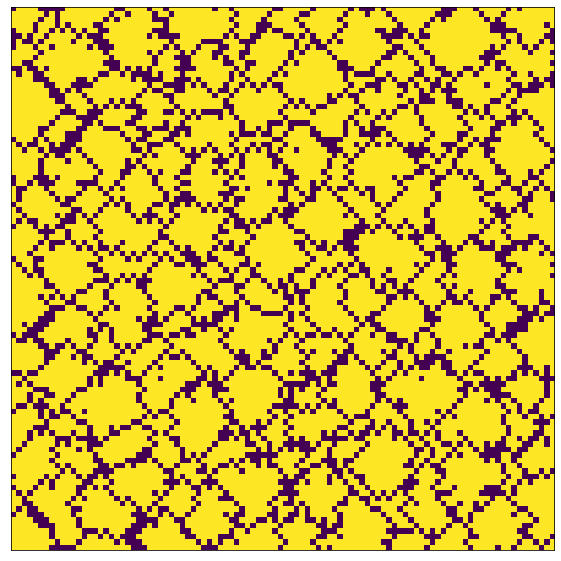

In [9]:
heightmap = load_heightmap("day09_data.txt")
heightmap_bool = heightmap < 9

plt.imshow(heightmap_bool)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

1198704


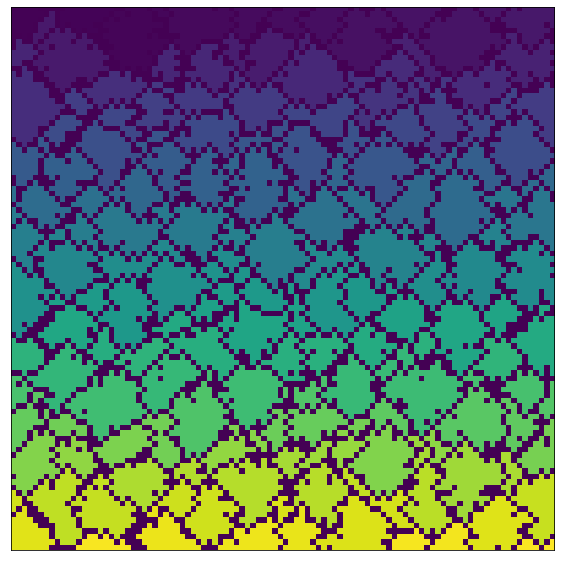

In [10]:
cc_info = cv2.connectedComponentsWithStats(heightmap_bool.astype(np.uint8), cv2.CV_32S, connectivity = 4)

(numLabels, labels, stats, centroids) = cc_info
stats = np.rot90(stats)
areas = stats[0]
areas = areas[1:]
areas = np.sort(areas)
max_areas = areas[-3:]
print(np.product(max_areas))

plt.imshow(labels)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()